In [3]:
import pandas as pd
import numpy as np
from textblob import TextBlob

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
data = pd.read_csv(r'/content/Womens Clothing E-Commerce Reviews.csv', na_values=['NA'])

In [4]:
data

,ID,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [5]:
text_data = data[['Review Text', 'Recommended IND']]

In [6]:
text_data = text_data.dropna()

In [7]:
train, test = train_test_split(text_data,test_size = 0.1)

In [8]:
train_pos = train[ train['Recommended IND'] == 1]
train_pos = train_pos['Review Text']
train_neg = train[ train['Recommended IND'] == 0]
train_neg = train_neg['Review Text']

In [9]:
train_pos.head(5)

,Review Text
6782,I kept going back to this sweater as this goes...
5056,This is such a clean and cute printed dress an...
23136,This runs tts - maybe a little on the large si...
7772,I like this dress because it has a 60's vibe. ...
16812,I love the style of this jacket! \ni will be c...


Positive words


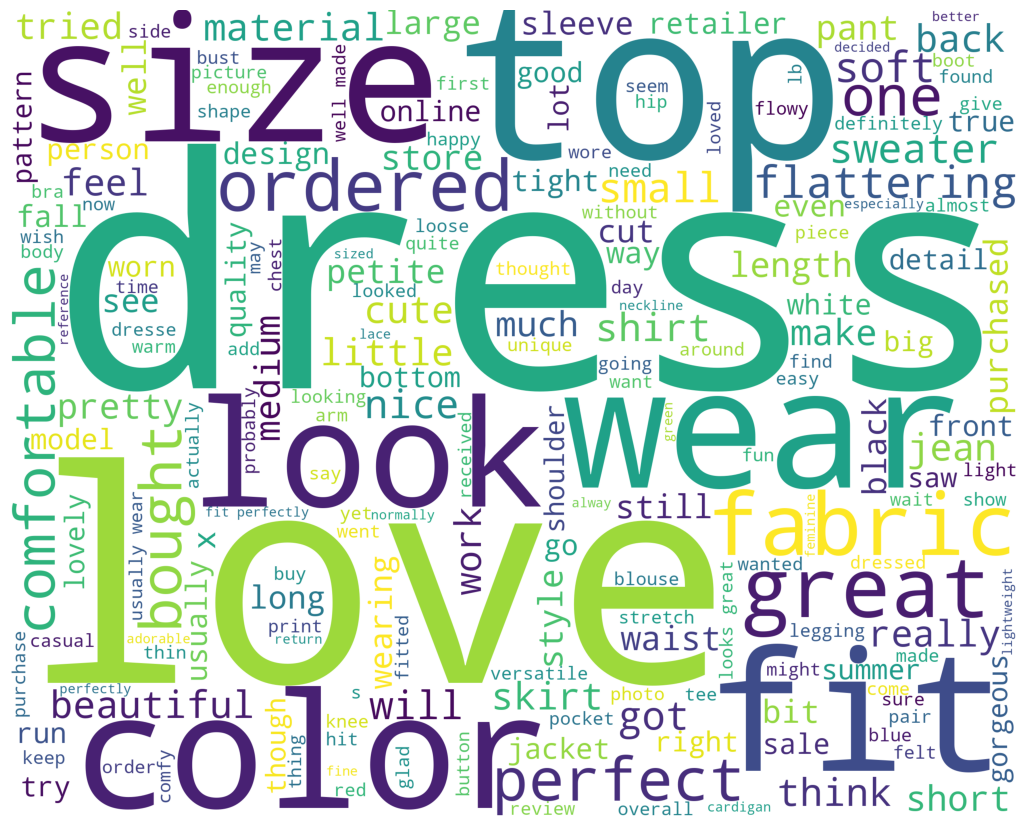

Negative words


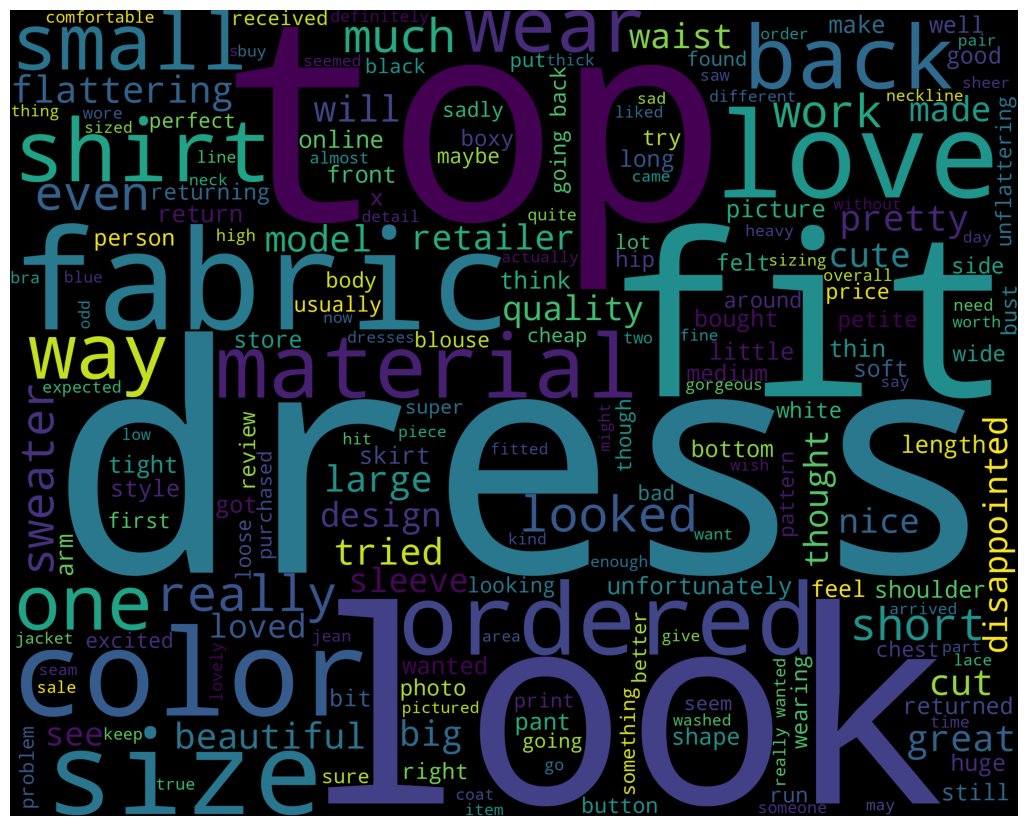

In [10]:
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)

In [11]:
reviews = []
stopwords_set = set(stopwords.words("english"))

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row['Review Text'].split() if len(e) >= 3]
    words_without_stopwords = [word for word in words_filtered if not word in stopwords_set]
    reviews.append((words_without_stopwords, row['Recommended IND']))

test_pos = test[ test['Recommended IND'] == 1]
test_pos = test_pos['Review Text']
test_neg = test[ test['Recommended IND'] == 0]
test_neg = test_neg['Review Text']

In [12]:
# reviews.size() # Incorrect
len(reviews) # Correct way to get the number of elements in a list

20376

In [13]:
def get_words_in_reviews(reviews):
    all = []
    for (words, sentiment) in reviews:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_reviews(reviews))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)

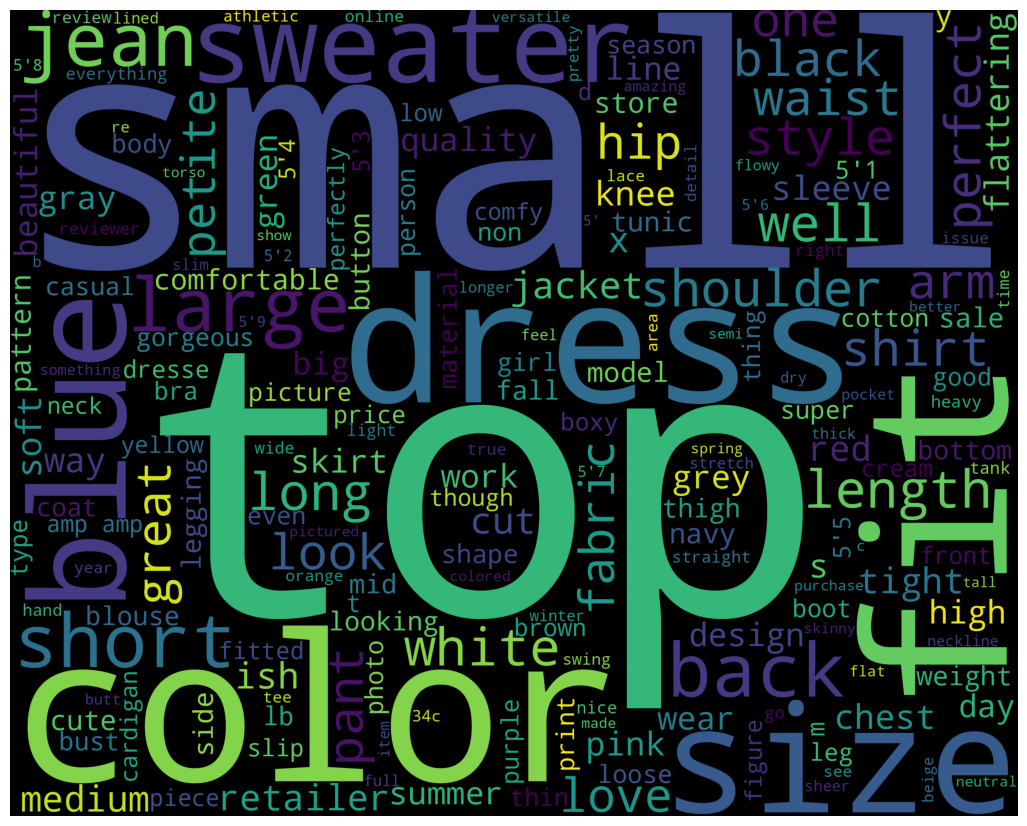

In [14]:
wordcloud_draw(w_features)

In [15]:
words_filtered

['pretty',
 'blouse',
 'but',
 'the',
 'polyester',
 'fabric',
 'makes',
 'incredibly',
 'warm',
 'and',
 'uncomfortable',
 'after',
 'while.',
 'had',
 'return',
 'it.']

In [16]:
words_without_stopwords

['pretty',
 'blouse',
 'polyester',
 'fabric',
 'makes',
 'incredibly',
 'warm',
 'uncomfortable',
 'while.',
 'return',
 'it.']

In [17]:
def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    # Add the return statement to return the features dictionary
    return features

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Positive words


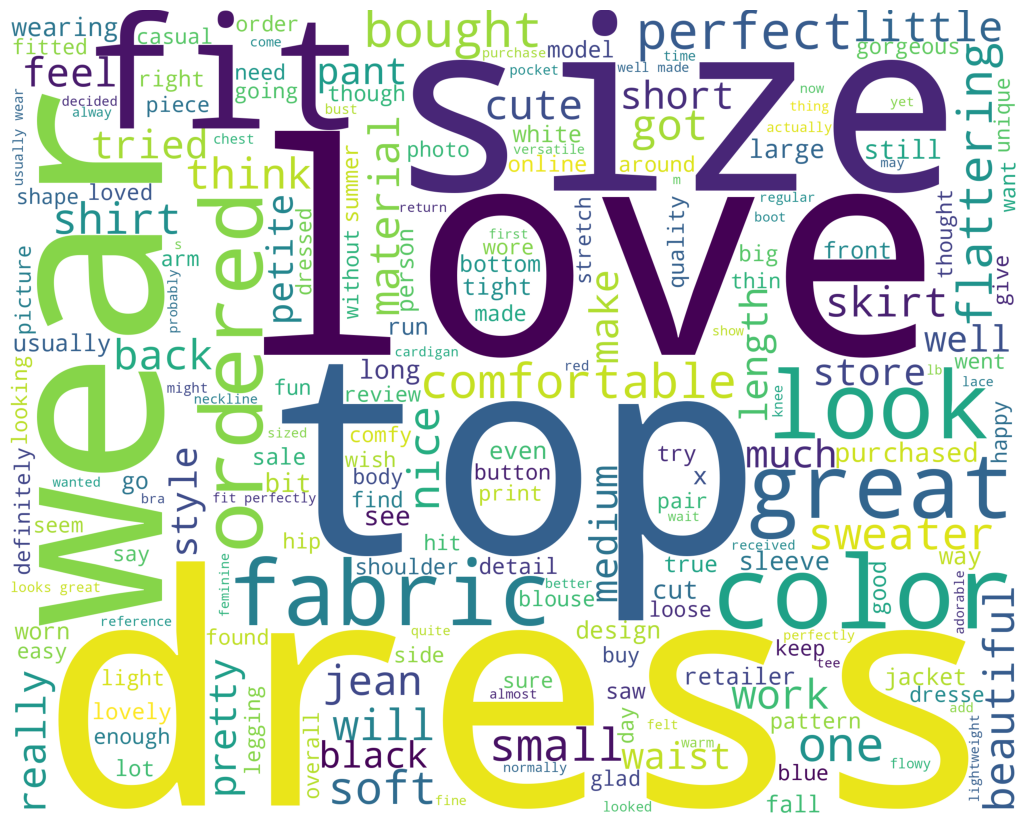

Negative words


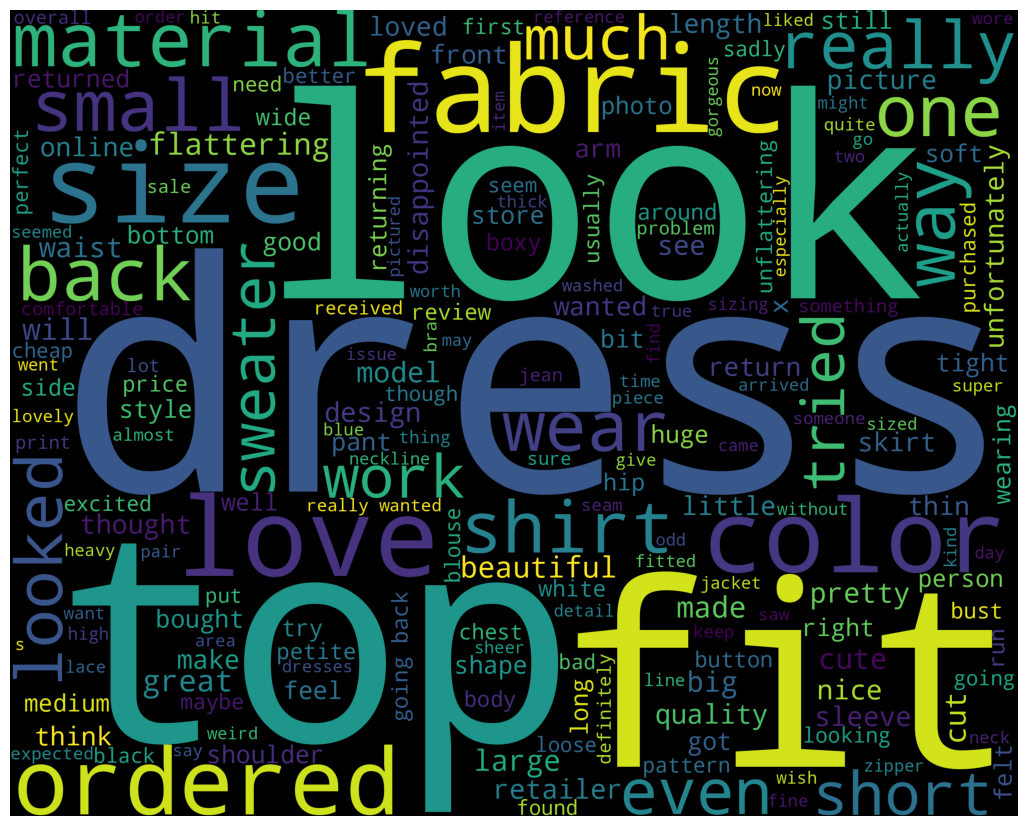

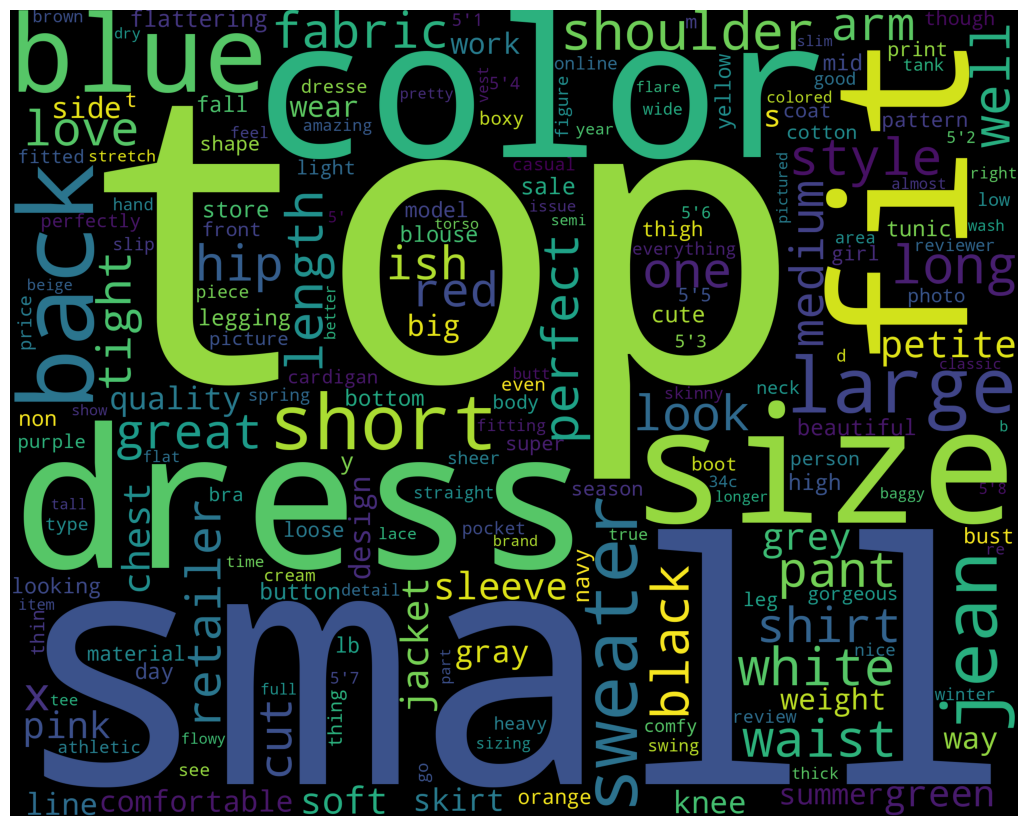

["i'm",
 '5\'5"',
 'tall,',
 '145',
 'lbs,',
 'and',
 '38-32-40',
 'and',
 'the',
 'pilcro',
 'hyphen',
 'chinos',
 'and',
 'stet',
 'chinos',
 'fit',
 'perfectly,',
 'bit',
 'loose',
 'the',
 'size',
 '30.',
 'the',
 'size',
 'this',
 'flare',
 'pant',
 'was',
 'snug',
 'the',
 'hips',
 'and',
 'waist',
 'and',
 'loose',
 'the',
 'thighs',
 'and',
 'legs.',
 'could',
 'not',
 'tuck',
 'shirt',
 'in.',
 'the',
 'front',
 'pockets',
 'with',
 'the',
 'leather',
 'trim',
 'are',
 'sewn',
 'shut.',
 "i'm",
 'fine',
 'with',
 'this,',
 'keeps',
 'the',
 'pockets',
 'aligned',
 'properly.',
 'however,',
 'there',
 'are',
 'still',
 'pockets',
 'the',
 'inside',
 'incase',
 'you',
 'want',
 'unpick',
 'all',
 'the',
 'stitching',
 "that's",
 'keeping',
 'the',
 'pocket',
 'clo']

In [18]:
# %%
import pandas as pd
import numpy as np
from textblob import TextBlob

import nltk
# Ensure this cell is run before using stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

# Rest of your code
data = pd.read_csv(r'/content/Womens Clothing E-Commerce Reviews.csv', na_values=['NA'])

text_data = data[['Review Text', 'Recommended IND']]

text_data = text_data.dropna()

train, test = train_test_split(text_data,test_size = 0.1)

train_pos = train[ train['Recommended IND'] == 1]
train_pos = train_pos['Review Text']
train_neg = train[ train['Recommended IND'] == 0]
train_neg = train_neg['Review Text']

train_pos.head(5)

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)

reviews = []
stopwords_set = set(stopwords.words("english")) # This line requires stopwords to be defined

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row['Review Text'].split() if len(e) >= 3]
    words_without_stopwords = [word for word in words_filtered if not word in stopwords_set]
    reviews.append((words_without_stopwords, row['Recommended IND']))

test_pos = test[ test['Recommended IND'] == 1]
test_pos = test_pos['Review Text']
test_neg = test[ test['Recommended IND'] == 0]
test_neg = test_neg['Review Text']

# reviews.size() # Incorrect
len(reviews) # Correct way to get the number of elements in a list

def get_words_in_reviews(reviews):
    all = []
    for (words, sentiment) in reviews:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_reviews(reviews))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    # Add the return statement to return the features dictionary
    return features

wordcloud_draw(w_features)

words_filtered # This variable is likely not defined outside the loop.

In [19]:
reviews = []
stopwords_set = set(stopwords.words("english"))

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row['Review Text'].split() if len(e) >= 3]
    words_without_stopwords = [word for word in words_filtered if not word in stopwords_set]
    reviews.append((words_without_stopwords, row['Recommended IND']))

test_pos = test[ test['Recommended IND'] == 1]
test_pos = test_pos['Review Text']
test_neg = test[ test['Recommended IND'] == 0]
test_neg = test_neg['Review Text']

In [ ]:
# Assuming you want to use SklearnClassifier, you need to import a suitable classifier from sklearn
# For example, a Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB
# Import SklearnClassifier from nltk.classify
from nltk.classify import SklearnClassifier

# Import the nltk module
import nltk
from nltk.corpus import stopwords # Import stopwords here if not already imported

# Define the extract_features function here, before it is used
# Assuming w_features is defined in a preceding cell or this cell
def extract_features(document):
    document_words = set(document)
    features = {}
    # Ensure w_features is accessible, if defined in a previous cell, it needs to be run first.
    # If w_features is not defined yet, you'll get a NameError for w_features instead.
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    # Add the return statement to return the features dictionary
    return features

# Code to define 'reviews' - included from ipython-input-8-4091600149 or ipython-input-7-4091600149
# Ensure 'train' DataFrame is defined before this block
reviews = []
# Ensure stopwords.words is accessible, requires nltk.download('stopwords') and import
stopwords_set = set(stopwords.words("english"))

# Assuming 'train' DataFrame is available from previous cells
if 'train' in locals() and isinstance(train, pd.DataFrame):
    for index, row in train.iterrows():
        if isinstance(row['Review Text'], str): # Check if the review text is a string
            words_filtered = [e.lower() for e in row['Review Text'].split() if len(e) >= 3]
            words_without_stopwords = [word for word in words_filtered if not word in stopwords_set]
            reviews.append((words_without_stopwords, row['Recommended IND']))
        else:
            # Handle cases where 'Review Text' might not be a string (e.g., NaN values)
            # This should ideally be handled by the data cleaning step (dropna),
            # but adding a check here makes the code more robust.
            pass # Skip non-string review texts

    # Ensure 'w_features' is defined before calling extract_features
    # This part would typically be in a cell before the classifier training.
    # Assuming get_words_in_reviews and get_word_features are defined.
    # w_features = get_word_features(get_words_in_reviews(reviews)) # Example call, ensure dependencies are met
else:
    print("Error: 'train' DataFrame not found. Please run the data loading and splitting cells first.")


# Create an instance of the SklearnClassifier using the chosen sklearn classifier
# Assuming w_features has been successfully defined by this point.
if 'w_features' in locals():
    classifier = SklearnClassifier(MultinomialNB())

    # Train the classifier using the prepared reviews data
    # The reviews data should be in the format [(features, label), ...]
    # You need to apply the extract_features function to your training data
    training_set = nltk.classify.apply_features(extract_features, reviews)

    # Train the classifier
    classifier.train(training_set)

    # Now you can use the 'classifier' object to make predictions as intended in the next cell
    neg_cnt = 0
    pos_cnt = 0
    # Ensure 'test_neg' and 'test_pos' are defined, likely from the same cell that defined 'reviews'
    if 'test_neg' in locals() and 'test_pos' in locals():
        for obj in test_neg:
            if isinstance(obj, str):
                res =  classifier.classify(extract_features(obj.split()))
                if(res == 0):
                    neg_cnt = neg_cnt + 1
        for obj in test_pos:
            if isinstance(obj, str):
                res =  classifier.classify(extract_features(obj.split()))
                if(res == 1):
                    pos_cnt = pos_cnt + 1

        print('[Negative]: %s/%s '  % (len(test_neg),neg_cnt))
        print('[Positive]: %s/%s '  % (len(test_pos),pos_cnt))
    else:
        print("Error: 'test_neg' or 'test_pos' not found. Please run the data loading and splitting cells first.")
else:
    print("Error: 'w_features' not found. Please run the cells that define 'reviews' and 'w_features'.")

In [ ]:
# Assuming you want to use SklearnClassifier, you need to import a suitable classifier from sklearn
# For example, a Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB
# Import SklearnClassifier from nltk.classify
from nltk.classify import SklearnClassifier

# Import the nltk module
import nltk
# Import stopwords here if not already imported
from nltk.corpus import stopwords
import pandas as pd # Ensure pandas is imported for DataFrame check

# Define the extract_features function here, before it is used
# Assuming w_features is defined in a preceding cell or this cell
def extract_features(document):
    document_words = set(document)
    features = {}
    # Ensure w_features is accessible, if defined in a previous cell, it needs to be run first.
    # If w_features is not defined yet, you'll get a NameError for w_features instead.
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    # Add the return statement to return the features dictionary
    return features

# Code to define 'reviews' - included from ipython-input-8-4091600149 or ipython-input-7-4091600149
# Ensure 'train' DataFrame is defined before this block
reviews = []
# Ensure stopwords.words is accessible, requires nltk.download('stopwords') and import
stopwords_set = set(stopwords.words("english"))

# Check if the 'train' DataFrame is empty
if 'train' in locals() and isinstance(train, pd.DataFrame) and not train.empty:
    print(f"Processing {len(train)} training reviews...")
    for index, row in train.iterrows():
        if isinstance(row['Review Text'], str): # Check if the review text is a string
            words_filtered = [e.lower() for e in row['Review Text'].split() if len(e) >= 3]
            words_without_stopwords = [word for word in words_filtered if not word in stopwords_set]
            reviews.append((words_without_stopwords, row['Recommended IND']))
        else:
            # Handle cases where 'Review Text' might not be a string (e.g., NaN values)
            # This should ideally be handled by the data cleaning step (dropna),
            # but adding a check here makes the code more robust.
            pass # Skip non-string review texts
    print(f"Created {len(reviews)} processed reviews.")

    # Ensure 'w_features' is defined before calling extract_features
    # This part would typically be in a cell before the classifier training.
    # Assuming get_words_in_reviews and get_word_features are defined.
    # Call the functions to define w_features
    def get_words_in_reviews(reviews):
        all = []
        for (words, sentiment) in reviews:
            all.extend(words)
        return all

    def get_word_features(wordlist):
        wordlist = nltk.FreqDist(wordlist)
        features = wordlist.keys()
        return features

    w_features = get_word_features(get_words_in_reviews(reviews))
    print(f"Extracted {len(w_features)} word features.")


    # Create an instance of the SklearnClassifier using the chosen sklearn classifier
    # Assuming w_features has been successfully defined by this point.
    if 'w_features' in locals() and w_features: # Also check if w_features is not empty
        classifier = SklearnClassifier(MultinomialNB())

        # Train the classifier using the prepared reviews data
        # The reviews data should be in the format [(features, label), ...]
        # You need to apply the extract_features function to your training data
        training_set = nltk.classify.apply_features(extract_features, reviews)

        if training_set: # Check if the training set is not empty
            print("Training the classifier...")
            # Train the classifier
            classifier.train(training_set)
            print("Classifier trained.")

            # Now you can use the 'classifier' object to make predictions as intended in the next cell
            neg_cnt = 0
            pos_cnt = 0
            # Ensure 'test_neg' and 'test_pos' are defined, likely from the same cell that defined 'reviews'
            if 'test_neg' in locals() and 'test_pos' in locals():
                print("Evaluating on test data...")
                for obj in test_neg:
                    if isinstance(obj, str):
                        res =  classifier.classify(extract_features(obj.split()))
                        if(res == 0):
                            neg_cnt = neg_cnt + 1
                for obj in test_pos:
                    if isinstance(obj, str):
                        res =  classifier.classify(extract_features(obj.split()))
                        if(res == 1):
                            pos_cnt = pos_cnt + 1

                print('[Negative]: %s/%s '  % (len(test_neg),neg_cnt))
                print('[Positive]: %s/%s '  % (len(test_pos),pos_cnt))
            else:
                print("Error: 'test_neg' or 'test_pos' not found. Please run the data loading and splitting cells first.")
        else:
            print("Error: Training set is empty. Cannot train the classifier.")
    else:
        print("Error: 'w_features' not found or is empty. Cannot train the classifier.")
else:
    print("Error: 'train' DataFrame not found or is empty. Please run the data loading and splitting cells first and ensure data is loaded correctly.")

In [ ]:
# Assuming you want to use SklearnClassifier, you need to import a suitable classifier from sklearn
# For example, a Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB
# Import SklearnClassifier from nltk.classify
from nltk.classify import SklearnClassifier

# Import the nltk module
import nltk
# Import stopwords here if not already imported
from nltk.corpus import stopwords
import pandas as pd # Ensure pandas is imported for DataFrame check

# Define the extract_features function here, before it is used
# Assuming w_features is defined in a preceding cell or this cell
def extract_features(document):
    document_words = set(document)
    features = {}
    # Ensure w_features is accessible, if defined in a previous cell, it needs to be run first.
    # If w_features is not defined yet, you'll get a NameError for w_features instead.
    # Add a check to ensure w_features is not empty
    if w_features:
        for word in w_features:
            features['contains(%s)' % word] = (word in document_words)
    # Add the return statement to return the features dictionary
    return features

# Ensure get_words_in_reviews and get_word_features are defined
def get_words_in_reviews(reviews):
    all = []
    for (words, sentiment) in reviews:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features


# Code to define 'reviews' - included from ipython-input-8-4091600149 or ipython-input-7-4091600149
# Ensure 'train' DataFrame is defined before this block.
# This assumes the cells loading and splitting the data have been run.
reviews = []
# Ensure stopwords.words is accessible, requires nltk.download('stopwords') and import
stopwords_set = set(stopwords.words("english"))

# Check if the 'train' DataFrame is empty
if 'train' in locals() and isinstance(train, pd.DataFrame) and not train.empty:
    print(f"Processing {len(train)} training reviews...")
    for index, row in train.iterrows():
        # Add a check to ensure 'Review Text' is not None before accessing its value
        if pd.notna(row['Review Text']) and isinstance(row['Review Text'], str):
            words_filtered = [e.lower() for e in row['Review Text'].split() if len(e) >= 3]
            words_without_stopwords = [word for word in words_filtered if not word in stopwords_set]
            reviews.append((words_without_stopwords, row['Recommended IND']))
        else:
            # Handle cases where 'Review Text' might not be a string or is NaN
            # This should ideally be handled by the data cleaning step (dropna),
            # but adding a check here makes the code more robust.
            pass # Skip non-string or NaN review texts
    print(f"Created {len(reviews)} processed reviews.")

    # Ensure 'w_features' is defined before calling extract_features
    # This part would typically be in a cell before the classifier training.
    # Assuming get_words_in_reviews and get_word_features are defined.
    # Call the functions to define w_features
    if reviews: # Only compute features if there are reviews
        w_features = get_word_features(get_words_in_reviews(reviews))
        print(f"Extracted {len(w_features)} word features.")
    else:
        w_features = [] # Initialize w_features as empty if no reviews
        print("No reviews processed. Cannot extract word features.")


    # Create an instance of the SklearnClassifier using the chosen sklearn classifier
    # Assuming w_features has been successfully defined by this point.
    # Add a check to ensure w_features is not empty before creating the classifier
    if 'w_features' in locals() and w_features: # Also check if w_features is not empty
        classifier = SklearnClassifier(MultinomialNB())

        # Train the classifier using the prepared reviews data
        # The reviews data should be in the format [(features, label), ...]
        # You need to apply the extract_features function to your training data
        # Ensure reviews list is not empty before applying features
        if reviews:
            training_set = nltk.classify.apply_features(extract_features, reviews)

            if training_set: # Check if the training set is not empty
                print("Training the classifier...")
                # Train the classifier
                classifier.train(training_set)
                print("Classifier trained.")

                # Now you can use the 'classifier' object to make predictions as intended in the next cell
                neg_cnt = 0
                pos_cnt = 0
                # Ensure 'test_neg' and 'test_pos' are defined, likely from the same cell that defined 'reviews'
                if 'test_neg' in locals() and 'test_pos' in locals():
                    print("Evaluating on test data...")
                    for obj in test_neg:
                        # Add a check to ensure the test object is a string before splitting
                        if isinstance(obj, str):
                            res =  classifier.classify(extract_features(obj.split()))
                            if(res == 0):
                                neg_cnt = neg_cnt + 1
                    for obj in test_pos:
                         # Add a check to ensure the test object is a string before splitting
                        if isinstance(obj, str):
                            res =  classifier.classify(extract_features(obj.split()))
                            if(res == 1):
                                pos_cnt = pos_cnt + 1

                    print('[Negative]: %s/%s '  % (len(test_neg),neg_cnt))
                    print('[Positive]: %s/%s '  % (len(test_pos),pos_cnt))
                else:
                    print("Error: 'test_neg' or 'test_pos' not found. Please run the data loading and splitting cells first.")
            else:
                print("Error: Training set is empty. Cannot train the classifier.")
        else:
             print("Error: 'reviews' list is empty. Cannot create training set.")
    else:
        print("Error: 'w_features' not found or is empty. Cannot train the classifier.")
else:
    print("Error: 'train' DataFrame not found or is empty. Please run the data loading and splitting cells first and ensure data is loaded correctly.")

In [5]:
data.describe()

,ID,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [6]:
# prompt: write a function that can inculcate the mutinomal naive bayes function in the above data set and get the output out

import pandas as pd
def train_and_evaluate_multinomial_nb(train_df, test_df):
    """
    Trains a Multinomial Naive Bayes classifier on text data and evaluates it.

    Args:
        train_df (pd.DataFrame): DataFrame with 'Review Text' and 'Recommended IND' columns for training.
        test_df (pd.DataFrame): DataFrame with 'Review Text' and 'Recommended IND' columns for testing.

    Returns:
        None: Prints the classification results.
    """
    nltk.download('stopwords', quiet=True)
    stopwords_set = set(stopwords.words("english"))

    # Prepare training data
    reviews = []
    if not train_df.empty:
        for index, row in train_df.iterrows():
            if pd.notna(row['Review Text']) and isinstance(row['Review Text'], str):
                words_filtered = [e.lower() for e in row['Review Text'].split() if len(e) >= 3]
                words_without_stopwords = [word for word in words_filtered if word not in stopwords_set]
                reviews.append((words_without_stopwords, row['Recommended IND']))
        print(f"Prepared {len(reviews)} training data points.")
    else:
        print("Training DataFrame is empty. Cannot train the model.")
        return

    # Extract word features
    def get_words_in_reviews(reviews):
        all_words = []
        for (words, sentiment) in reviews:
            all_words.extend(words)
        return all_words

    def get_word_features(wordlist):
        wordlist = nltk.FreqDist(wordlist)
        features = wordlist.keys()
        return features

    if reviews:
        w_features = get_word_features(get_words_in_reviews(reviews))
        print(f"Extracted {len(w_features)} word features.")
    else:
        print("No reviews to extract features from.")
        return

    # Define feature extraction function
    def extract_features(document):
        document_words = set(document)
        features = {}
        if w_features:
            for word in w_features:
                features['contains(%s)' % word] = (word in document_words)
        return features

    # Create and train the classifier
    if w_features:
        classifier = SklearnClassifier(MultinomialNB())

        if reviews:
            training_set = nltk.classify.apply_features(extract_features, reviews)

            if training_set:
                print("Training the Multinomial Naive Bayes classifier...")
                classifier.train(training_set)
                print("Classifier trained.")

                # Evaluate on test data
                if not test_df.empty:
                    print("Evaluating on test data...")
                    test_neg = test_df[ test_df['Recommended IND'] == 0]['Review Text']
                    test_pos = test_df[ test_df['Recommended IND'] == 1]['Review Text']

                    neg_cnt = 0
                    pos_cnt = 0

                    for obj in test_neg:
                        if isinstance(obj, str):
                            res =  classifier.classify(extract_features(obj.split()))
                            if(res == 0):
                                neg_cnt += 1
                    for obj in test_pos:
                        if isinstance(obj, str):
                            res =  classifier.classify(extract_features(obj.split()))
                            if(res == 1):
                                pos_cnt += 1

                    print('[Negative]: %s/%s '  % (len(test_neg),neg_cnt))
                    print('[Positive]: %s/%s '  % (len(test_pos),pos_cnt))
                else:
                    print("Test DataFrame is empty. Cannot evaluate the model.")
            else:
                print("Training set is empty. Cannot train the classifier.")
        else:
            print("'reviews' list is empty. Cannot create training set.")
    else:
        print("'w_features' not found or is empty. Cannot train the classifier.")


# Assuming 'train' and 'test' DataFrames are available from previous cells
# You would call the function like this:
if 'train' in locals() and isinstance(train, pd.DataFrame) and \
   'test' in locals() and isinstance(test, pd.DataFrame):
    train_and_evaluate_multinomial_nb(train, test)
else:
    print("Please ensure 'train' and 'test' DataFrames are defined before calling the function.")



Please ensure 'train' and 'test' DataFrames are defined before calling the function.


In [8]:
data.describe()

,ID,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000
